# A

## A(1)

In [1]:
import numpy as np
data=np.load('part1a.npz')
data

In [2]:
np.sum((2,3,4))

9

In [3]:
N = data['N']
print(N)

100000.0


In [4]:
Svc_0_pmf = data['Svc_0_pmf']
print(Svc_0_pmf)

[[0.10953309 0.03300776 0.08179044 0.11593994]
 [0.03089752 0.08511994 0.04528764 0.05718283]
 [0.07471465 0.02495643 0.10236599 0.04256696]
 [0.01605863 0.08109608 0.09158212 0.00789999]]


In [5]:
Lc = data['Lc']
print(Lc)

[0.3 0.4 0.7 1. ]


In [6]:
Ic_0 = data['Ic_0']
print(Ic_0)

[47 90 51 65]


In [7]:
gamma = data['gamma']
print(gamma)

0.07142857142857142


In [8]:
from scipy import integrate
from itertools import product
import matplotlib.pyplot as plt
import matplotlib as mpl

beta_values = np.linspace(0,1,16)
t=np.linspace(1,120,120)

#print(beta_values)
#print(t)

In [9]:
def SIR_model(t, Y, betas, gamma):
    S_vector=Y[:16]
    I_vector=Y[16:20]
    R=Y[20]
    
    dSvc_dt= -(betas*S_vector*sum(I_vector))/N
    dIc_dt1= -np.sum((dSvc_dt[0], dSvc_dt[4], dSvc_dt[8], dSvc_dt[12]))-gamma*I_vector[0]
    dIc_dt2= -np.sum((dSvc_dt[1], dSvc_dt[5], dSvc_dt[9], dSvc_dt[13]))-gamma*I_vector[1]
    dIc_dt3= -np.sum((dSvc_dt[2], dSvc_dt[6], dSvc_dt[10], dSvc_dt[14]))-gamma*I_vector[2]
    dIc_dt4= -np.sum((dSvc_dt[3], dSvc_dt[7], dSvc_dt[11], dSvc_dt[15]))-gamma*I_vector[3]
    dIc_dt = np.concatenate((dIc_dt1, dIc_dt2, dIc_dt3, dIc_dt4), axis=None)
    dR_dt= gamma*sum(I_vector)
    RHS_vector=np.concatenate((dSvc_dt, dIc_dt, dR_dt),axis=None)

    return RHS_vector

In [10]:
initial_states = np.concatenate((Svc_0_pmf*(N-sum(Ic_0)), Ic_0, 0), axis=None)
print(initial_states)

[10925.59735989  3292.42498916  8158.35136699 11564.66095375
  3081.93503133  8490.45835427  4517.30632554  5703.81528811
  7452.56208837  2489.3286058  10210.70031003  4245.92611737
  1601.80065781  8089.09109282  9135.04126738   788.00019138
    47.            90.            51.            65.
     0.        ]


In [11]:
soln_obj=integrate.solve_ivp(SIR_model, (t[0],t[-1]), initial_states, args=(beta_values, gamma), dense_output=True)

## A(2)

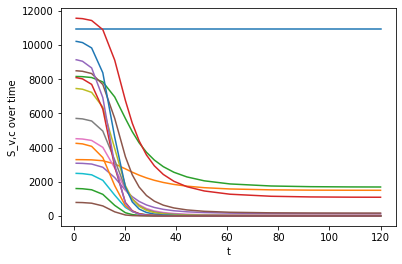

In [12]:
plt.plot(soln_obj.t, soln_obj.y[0:16].T)
plt.xlabel("t")
plt.ylabel("S_v,c over time")
plt.show()

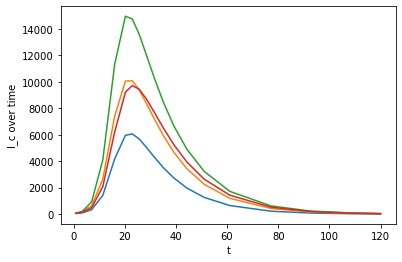

In [13]:
plt.plot(soln_obj.t, soln_obj.y[16:20].T)
plt.xlabel("t")
plt.ylabel("I_c over time")
plt.show()

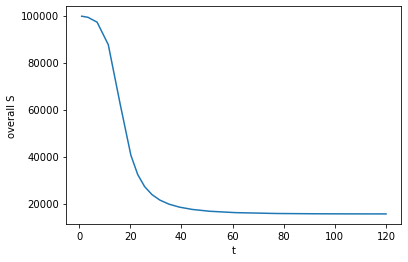

In [14]:
plt.plot(soln_obj.t, sum(soln_obj.y[0:16]))
plt.xlabel("t")
plt.ylabel("overall S")
plt.show()

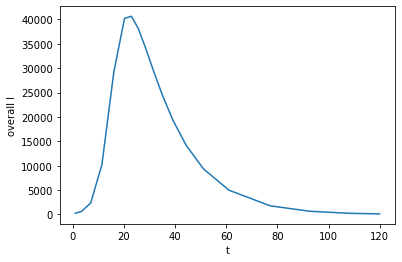

In [15]:
plt.plot(soln_obj.t, sum(soln_obj.y[16:20]))
plt.xlabel("t")
plt.ylabel("overall I")
plt.show()

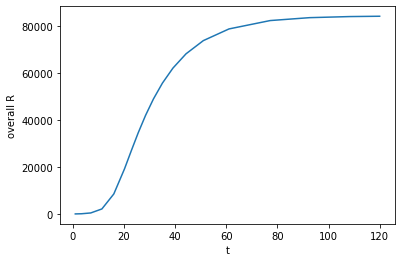

In [16]:
plt.plot(soln_obj.t, soln_obj.y[20].T)
plt.xlabel("t")
plt.ylabel("overall R")
plt.show()

In [17]:
I_0 = soln_obj.y[16]
I_1 = soln_obj.y[17]
I_2 = soln_obj.y[18]
I_3 = soln_obj.y[19]

IL_0 = (I_0*Lc[0])/N
IL_1 = (I_1*Lc[1])/N
IL_2 = (I_2*Lc[2])/N
IL_3 = (I_3*Lc[3])/N

Lsum1 = sum(IL_0, IL_1)
Lsum2 = sum(IL_2, IL_3)

overall_L = sum(Lsum1, Lsum2)
print(overall_L)

[4.07891349 4.07891354 4.07891398 4.07891841 4.07896526 4.07965016
 4.08307109 4.09899125 4.14045356 4.17044    4.17550008 4.17275336
 4.16531646 4.15522796 4.14347095 4.13074006 4.11760215 4.10462865
 4.09252577 4.08346306 4.08022411 4.07898567 4.07860558]


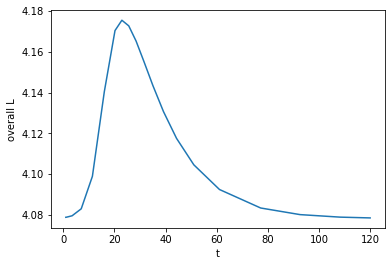

In [18]:
plt.plot(soln_obj.t, overall_L)
plt.xlabel("t")
plt.ylabel("overall L")
plt.show()

## A(3)

S, I and R look similar to what we expected. S exponentially decreases until it converges to some number meaning the entire population who can be infected has been infected, and I exponentially increases at the same rate until the entire population is infected and it then decreases until it converges to 0. R exponentially increases until it starts to plateau once the entire population recovers. When people say flatten the curve they are referring to the t vs I graph, i.e. the amount of total infected people over time. Flattening the curve makes it easier for hospitals to treat the infected by spreading out the amount of infected people over time rather than having everyone infected at once. 

## A(4)

Some $S_{v,c}$ compartments converged to a positive value because that amount of people within the given population may be immune or all the infected people had recovered already so the rest of the susceptible population had no one to be infected by. For one specific population the amount of susceptible people stayed constant the whole time meaning no one within the population came in touch with an infected person. 

## A(5)

In [19]:
uninfected=soln_obj.y[0:16].T[-1]
for i in range(len(uninfected)):
    total_pop=soln_obj.y[i].T[0]+Ic_0[i%4]
    print('{}% of the population for compartment Svc_0_pmf={} was never infected.'\
          .format(100*uninfected[i]/total_pop,Svc_0_pmf[i//4,i%4]))

99.57166021445576% of the population for compartment Svc_0_pmf=0.10953309232250617 was never infected.
44.32128786342576% of the population for compartment Svc_0_pmf=0.033007759523213415 was never infected.
20.604978626494624% of the population for compartment Svc_0_pmf=0.08179044349192716 was never infected.
9.389400077682573% of the population for compartment Svc_0_pmf=0.11593993757955955 was never infected.
4.235882599206055% of the population for compartment Svc_0_pmf=0.030897521041566966 was never infected.
1.938423516974024% of the population for compartment Svc_0_pmf=0.08511993698328356 was never infected.
0.8825655031964387% of the population for compartment Svc_0_pmf=0.045287640987079075 was never infected.
0.40216275930156037% of the population for compartment Svc_0_pmf=0.057182825429433544 was never infected.
0.18425915888792302% of the population for compartment Svc_0_pmf=0.0747146489455268 was never infected.
0.08161138009148458% of the population for compartment Svc_0_pmf

## A(6)

In [20]:
beta_values2=beta_values/4
soln_obj2=integrate.solve_ivp(SIR_model, (t[0],t[-1]), initial_states, args=(beta_values2, gamma), dense_output=True)

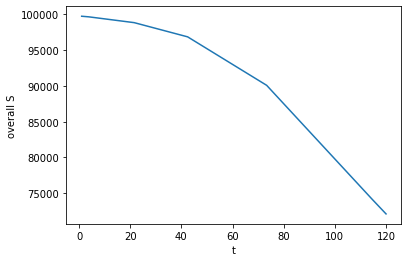

In [21]:
plt.plot(soln_obj2.t, sum(soln_obj2.y[0:16]))
plt.xlabel("t")
plt.ylabel("overall S")
plt.show()

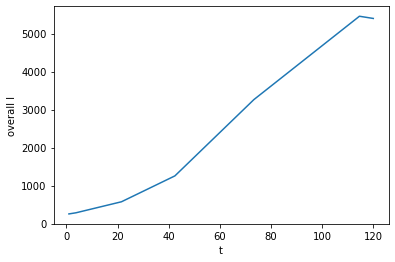

In [22]:
plt.plot(soln_obj2.t, sum(soln_obj2.y[16:20]))
plt.xlabel("t")
plt.ylabel("overall I")
plt.show()

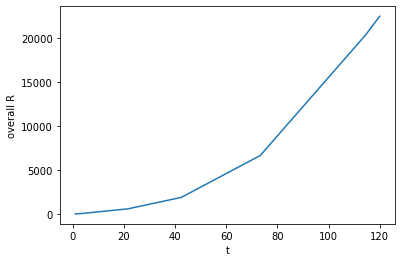

In [23]:
plt.plot(soln_obj2.t, soln_obj2.y[20].T)
plt.xlabel("t")
plt.ylabel("overall R")
plt.show()

The S, I and R plots are much different because of the smaller beta values. Each graph is not nearly as exponential as before and are closer to being linear. The curve has definitely flattened as cases are spread out more evenly as time goes by. By the end of the 120 days, there is way less of the total population infected as compared to the previous beta values. 

In [24]:
uninfected2=soln_obj2.y[0:16].T[-1]
for i in range(len(uninfected2)):
    total_pop=soln_obj2.y[i].T[0]+Ic_0[i%4]
    print('{}% of the population for compartment Svc_0_pmf={} was never infected.'\
          .format(100*uninfected2[i]/total_pop,Svc_0_pmf[i//4,i%4]))

99.57166021445576% of the population for compartment Svc_0_pmf=0.10953309232250617 was never infected.
92.36262762187542% of the population for compartment Svc_0_pmf=0.033007759523213415 was never infected.
89.47696861811578% of the population for compartment Svc_0_pmf=0.08179044349192716 was never infected.
84.95581567587065% of the population for compartment Svc_0_pmf=0.11593993757955955 was never infected.
79.84799774967071% of the population for compartment Svc_0_pmf=0.030897521041566966 was never infected.
76.11455082855593% of the population for compartment Svc_0_pmf=0.08511993698328356 was never infected.
72.17407882936608% of the population for compartment Svc_0_pmf=0.045287640987079075 was never infected.
68.47710563917298% of the population for compartment Svc_0_pmf=0.057182825429433544 was never infected.
65.30486092933351% of the population for compartment Svc_0_pmf=0.0747146489455268 was never infected.
60.18108306441667% of the population for compartment Svc_0_pmf=0.02495